Proyecto Final
==============

### Tratamiento de Datos
### Máster de Ing. de Telecomunicación

# Autores

Juan Manuel Espinosa Moral ([100406523@alumnos.uc3m.es](mailto:100406523@alumnos.uc3m.es))

José Manuel García Núñez ([100544621@alumnos.uc3m.es](mailto:100544621@alumnos.uc3m.es))

In [5]:
# Google Drive integration

# Libraries to work with Google Drive and the file system
from google.colab import drive
import os, sys

# Drive is mounted
drive.mount("/content/drive")

# Current directory is shown
print(os.getcwd())

# We change to work directory
directory_path = "/content/drive/MyDrive/Colab Notebooks/proyecto_td/"  # Define directory_path here
if not os.path.exists(directory_path):
  os.makedirs(directory_path)
  print(f"Directory created: {directory_path}")

os.chdir(directory_path) # Now change to the directory

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/proyecto_td


# 1. Análisis de Variables de Entrada
Carga del dataset: datos del archivo JSON.
Categorías: las más frecuentes.
Rating y visualizaciones.
Análisis de correlación: categorias y variables de salida.

Categorías más frecuentes:
 categories
Bon Appétit      9355
Peanut Free      8390
Soy Free         8088
Tree Nut Free    7044
Vegetarian       6846
Name: count, dtype: int64


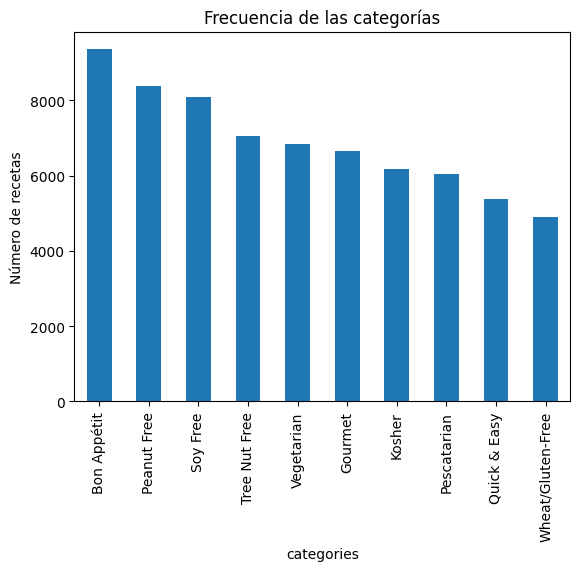

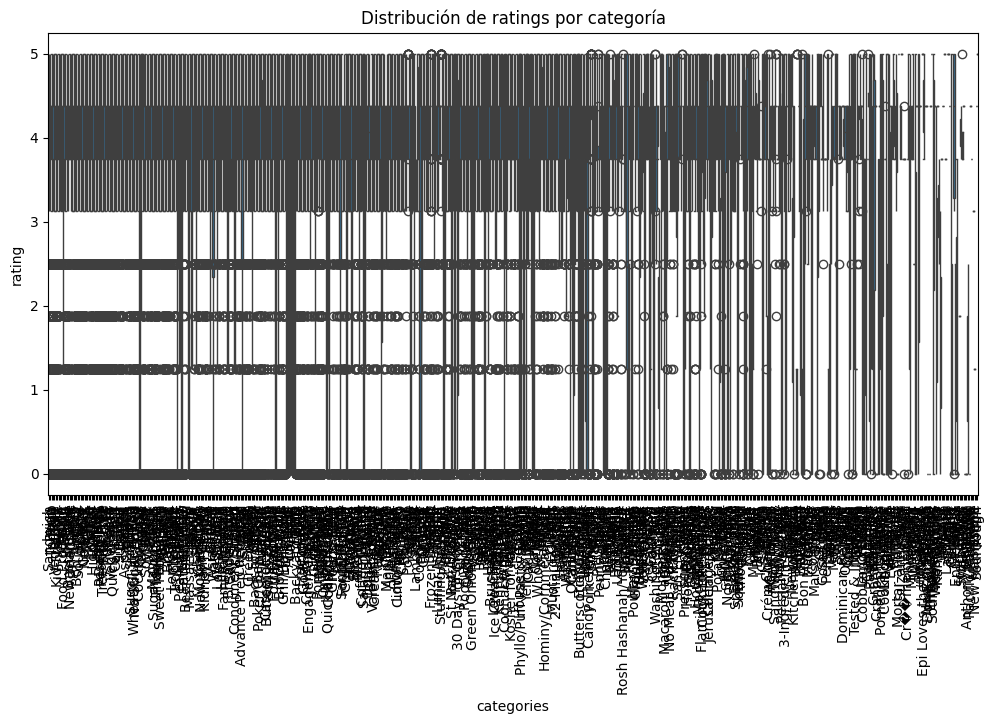

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo JSON
df = pd.read_json("full_format_recipes.json")

# Explorar las categorías más frecuentes
category_counts = df['categories'].explode().value_counts()
print("Categorías más frecuentes:\n", category_counts.head())

# Visualizar las categorías más frecuentes
category_counts.head(10).plot(kind='bar', title="Frecuencia de las categorías")
plt.ylabel("Número de recetas")
plt.show()

# Analizar la relación entre categorías y ratings
df_exploded = df.explode('categories')  # Expandir listas de categorías
# Reset the index to avoid duplicate index values
df_exploded = df_exploded.reset_index(drop=True)
plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='rating', data=df_exploded)
plt.xticks(rotation=90)
plt.title("Distribución de ratings por categoría")
plt.show()


Categorías más frecuentes:
 categories
Bon Appétit      9355
Peanut Free      8390
Soy Free         8088
Tree Nut Free    7044
Vegetarian       6846
Name: count, dtype: int64


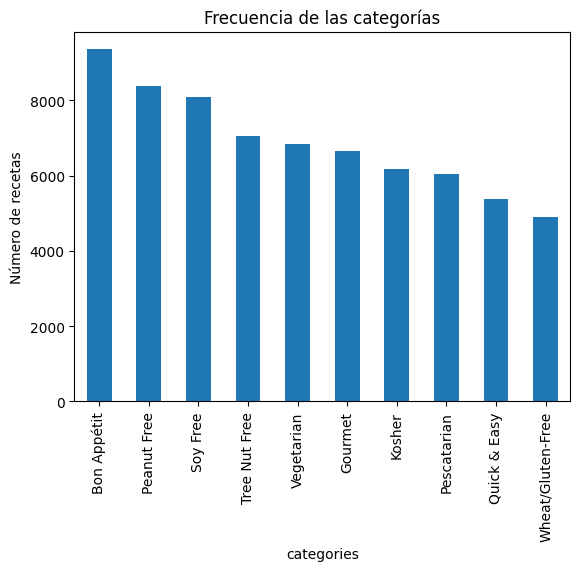

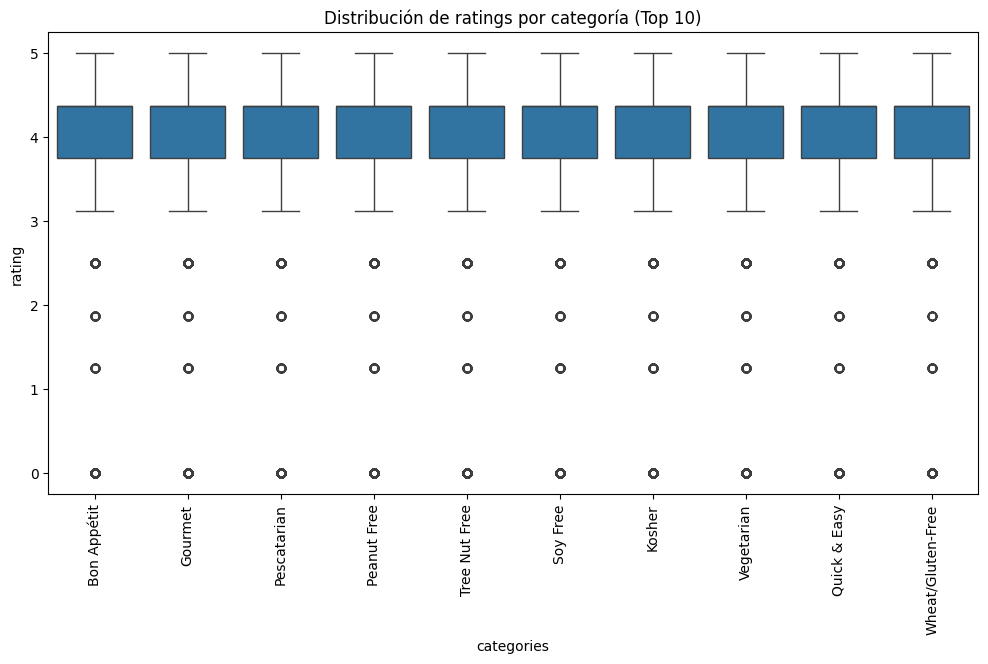

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo JSON
df = pd.read_json("full_format_recipes.json")

# Explorar las categorías más frecuentes
category_counts = df['categories'].explode().value_counts()
print("Categorías más frecuentes:\n", category_counts.head())

# Visualizar las categorías más frecuentes
category_counts.head(10).plot(kind='bar', title="Frecuencia de las categorías")
plt.ylabel("Número de recetas")
plt.show()

# Analizar la relación entre categorías y ratings, filtrando por las más frecuentes
df_exploded = df.explode('categories')  # Expandir listas de categorías
df_exploded = df_exploded.reset_index(drop=True)  # Resetear el índice

# Filtrar por las 10 categorías más frecuentes
top_categories = category_counts.head(10).index.tolist()
df_filtered = df_exploded[df_exploded['categories'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='rating', data=df_filtered)
plt.xticks(rotation=90)
plt.title("Distribución de ratings por categoría (Top 10)")
plt.show()